# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.plotting import scatter_matrix 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.feature_selection import RFECV

pd.options.display.float_format = '{:.5f}'.format
warnings.filterwarnings('ignore')

C:\Users\Dhia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


# Loading Data

In [2]:
allcars =pd.read_excel('all-cars.xls')
dataport = pd.read_excel('dataport.xlsx')
cars_origin = pd.read_csv('cars-origin.txt', sep="\t", header=None)

In [3]:
print(allcars.shape)
print(dataport.shape)
print(cars_origin.shape)


(428, 15)
(19, 17)
(393, 7)


In [4]:
allcars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.50000,6.00000,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.00000,4.00000,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.40000,4.00000,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.20000,6.00000,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.50000,6.00000,225,18,24,3880,115,197


# EDA

In [5]:
allcars.describe(include='all')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428,428,428,428,428,428.00000,428.00000,428.00000,426.00000,428.00000,428.00000,428.00000,428.00000,428.00000,428.00000
unique,38,425,6,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Toyota,G35 4dr,Sedan,Asia,Front,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,28,2,262,158,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,32774.85514,30014.70093,3.19673,5.80751,215.88551,20.06075,26.84346,3577.95327,108.15421,186.36215
std,NaN,NaN,NaN,NaN,NaN,19431.71667,17642.11775,1.10859,1.55844,71.83603,5.23822,5.74120,758.98321,8.31181,14.35799
min,NaN,NaN,NaN,NaN,NaN,10280.00000,9875.00000,1.30000,3.00000,73.00000,10.00000,12.00000,1850.00000,89.00000,143.00000
25%,NaN,NaN,NaN,NaN,NaN,20334.25000,18866.00000,2.37500,4.00000,165.00000,17.00000,24.00000,3104.00000,103.00000,178.00000
50%,NaN,NaN,NaN,NaN,NaN,27635.00000,25294.50000,3.00000,6.00000,210.00000,19.00000,26.00000,3474.50000,107.00000,187.00000
75%,NaN,NaN,NaN,NaN,NaN,39205.00000,35710.25000,3.90000,6.00000,255.00000,21.25000,29.00000,3977.75000,112.00000,194.00000


In [6]:
allcars.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

### Distribution by categorical data

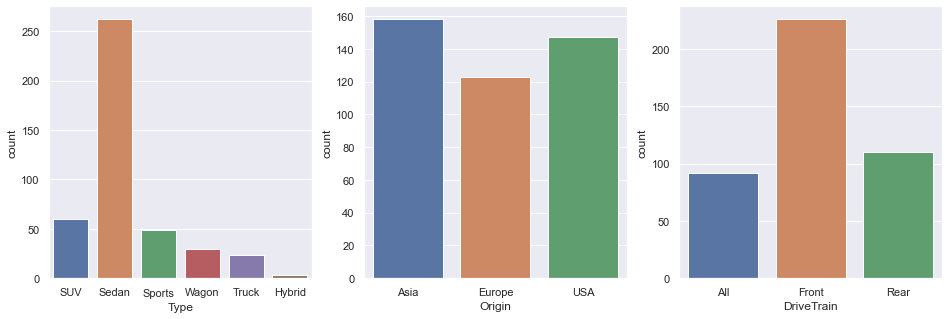

In [20]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(16,5)})
fig, ax =plt.subplots(1,3)
sns.countplot(allcars['Type'], ax=ax[0])
sns.countplot(allcars['Origin'], ax=ax[1])
sns.countplot(allcars['DriveTrain'], ax=ax[2])
fig.show()

### Outliers

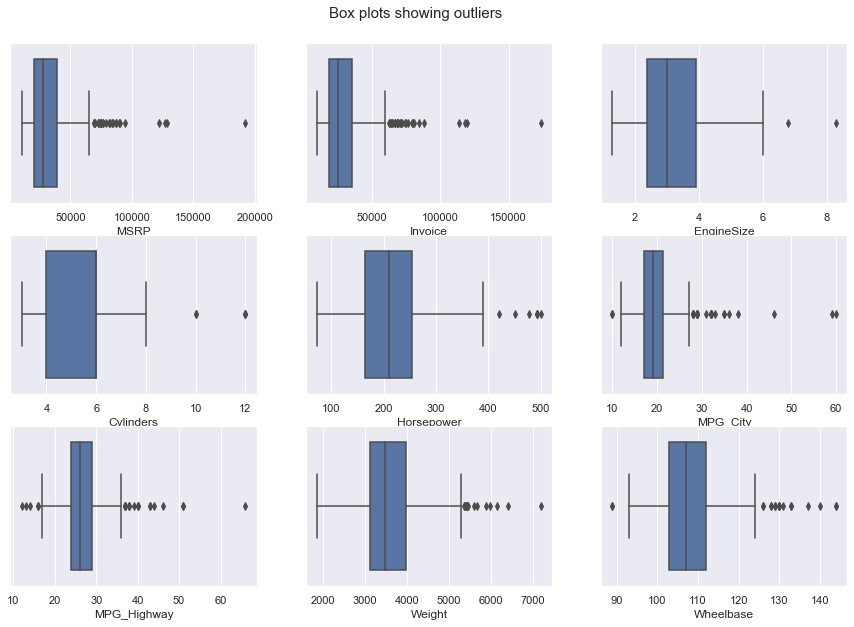

In [32]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), allcars, allcars.columns[5:]):
  sns.boxplot(allcars[name], ax = ax)

<AxesSubplot:>

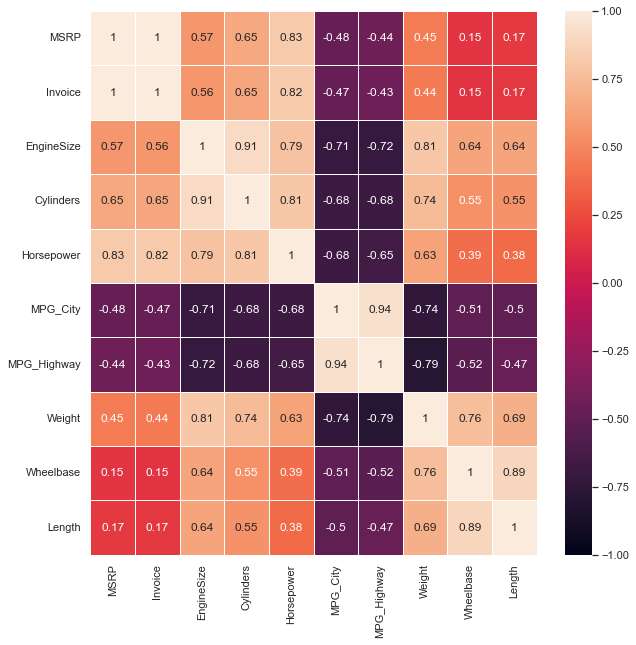

In [23]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(allcars.corr(), vmin=-1, vmax=1,annot=True,linewidths=.5, ax=ax)

array([[<AxesSubplot:xlabel='MSRP', ylabel='MSRP'>,
        <AxesSubplot:xlabel='Invoice', ylabel='MSRP'>,
        <AxesSubplot:xlabel='EngineSize', ylabel='MSRP'>,
        <AxesSubplot:xlabel='Cylinders', ylabel='MSRP'>,
        <AxesSubplot:xlabel='Horsepower', ylabel='MSRP'>,
        <AxesSubplot:xlabel='MPG_City', ylabel='MSRP'>,
        <AxesSubplot:xlabel='MPG_Highway', ylabel='MSRP'>,
        <AxesSubplot:xlabel='Weight', ylabel='MSRP'>,
        <AxesSubplot:xlabel='Wheelbase', ylabel='MSRP'>,
        <AxesSubplot:xlabel='Length', ylabel='MSRP'>],
       [<AxesSubplot:xlabel='MSRP', ylabel='Invoice'>,
        <AxesSubplot:xlabel='Invoice', ylabel='Invoice'>,
        <AxesSubplot:xlabel='EngineSize', ylabel='Invoice'>,
        <AxesSubplot:xlabel='Cylinders', ylabel='Invoice'>,
        <AxesSubplot:xlabel='Horsepower', ylabel='Invoice'>,
        <AxesSubplot:xlabel='MPG_City', ylabel='Invoice'>,
        <AxesSubplot:xlabel='MPG_Highway', ylabel='Invoice'>,
        <AxesSubplot:xl

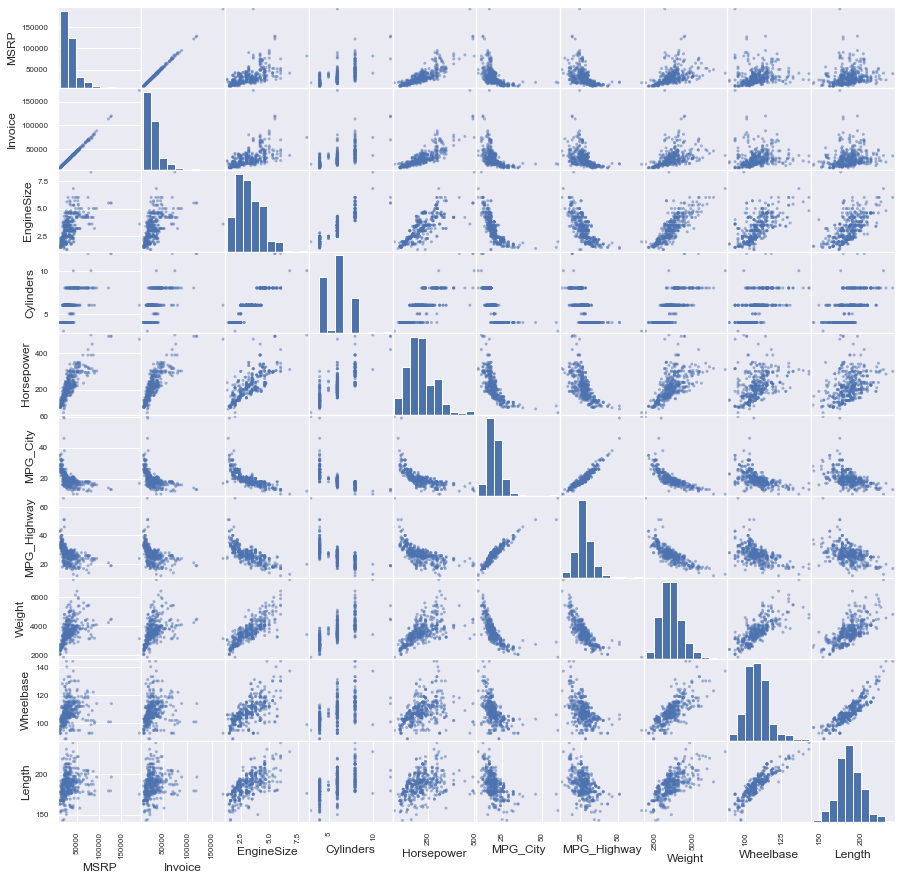

In [25]:
scatter_matrix(allcars,figsize=(15,15))

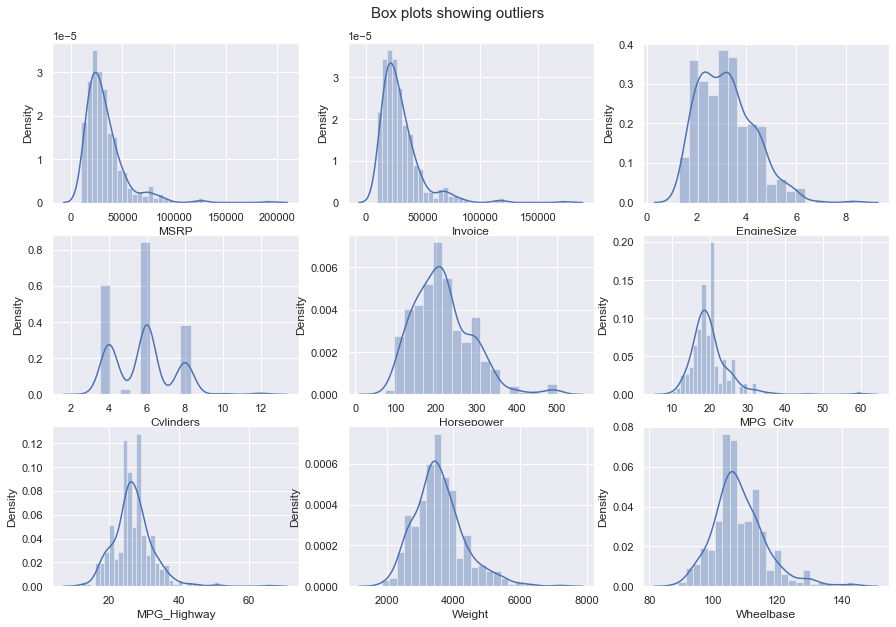

In [33]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), allcars, allcars.columns[5:]):
  sns.distplot(allcars[name], ax = ax)

## Data Processing

In [3]:
def process_data(filename):
    df = pd.read_excel(filename)
    df.drop(columns=['Model','Invoice','MPG_Highway'], inplace=True)
    df = pd.get_dummies(df,columns=['Origin','DriveTrain'])
    df['Make'] = df['Make'].astype('category')
    df['Make'] = df['Make'].cat.codes
    df['Type'] = df['Type'].astype('category')
    df['Type'] = df['Type'].cat.codes
    df = df.dropna(0)
    return df


In [4]:
df= process_data('all-cars.xls')
df.head()

,Make,Type,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,Weight,Wheelbase,Length,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,0,1,36945,3.50000,6.00000,265,17,4451,106,189,1,0,0,1,0,0
1,0,2,23820,2.00000,4.00000,200,24,2778,101,172,1,0,0,0,1,0
2,0,2,26990,2.40000,4.00000,200,22,3230,105,183,1,0,0,0,1,0
3,0,2,33195,3.20000,6.00000,270,20,3575,108,186,1,0,0,0,1,0
4,0,2,43755,3.50000,6.00000,225,18,3880,115,197,1,0,0,0,1,0


## Scaling

In [6]:
y = df[['MSRP']]
X = df.drop(columns=['MSRP'])

#sc = StandardScaler()
#mms = MinMaxScaler()
#X= mms.fit_transform(X)
#y= mms.fit_transform(y)

X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.3, random_state=0)

## Modeling

In [15]:
def evaluate_models(models,X,y):
    sc = StandardScaler()
    mms = MinMaxScaler()
    X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.3, random_state=0)
    #X_train = mms.fit_transform(X_train)
    #y_train = mms.fit_transform(y_train)
    model_names=[]
    rmse_scores = []
    rmse_scores_cv = []
    adjusted_r2s = []
    for model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        rmse = mean_squared_error(y_test,y_pred,squared=False)  
        scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
        rmse_cv = np.sqrt(-scores.mean()) 
        adjusted_r2 = 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
        adjusted_r2s.append(adjusted_r2)
        rmse_scores_cv.append(rmse_cv)             
        rmse_scores.append(rmse)             
        model_names.append(model.__class__.__name__)
    data = {
        'model_name':model_names,
        'RMSE_CV': rmse_scores_cv,
        'RMSE': rmse_scores,
        'Adjusted R2': adjusted_r2s
    }
    scoring_df = pd.DataFrame(data)
    return scoring_df.sort_values(by=['RMSE_CV'],ascending=True)


## Scoring base models

In [16]:
lr_model = LinearRegression()
poly_model = make_pipeline(PolynomialFeatures(2), lr_model)
knn_model = KNeighborsRegressor()
dt_model = DecisionTreeRegressor()
ada_model = AdaBoostRegressor()
xgb_model = XGBRegressor()
lgbm_model = LGBMRegressor()
histo_regressor = HistGradientBoostingRegressor()
gb_model = GradientBoostingRegressor()
xt_model = ExtraTreesRegressor()
forest_model = RandomForestRegressor()
ridge_model = Ridge()
lasso_model = Lasso()

base_models = [lr_model,
          poly_model,
          knn_model,
          dt_model,
          ada_model,
          xgb_model,
          lgbm_model,
          histo_regressor,
          gb_model,
          xt_model,
          forest_model,
          ridge_model,
          lasso_model]
          
scoring_df = evaluate_models(base_models, X,y)



In [14]:
scoring_df

,model_name,RMSE_CV,RMSE,Adjusted R2
10,RandomForestRegressor,9482.19181,41156.89865,-2.98530
8,GradientBoostingRegressor,10098.70951,41156.86804,-2.98529
9,ExtraTreesRegressor,10181.36428,41156.96312,-2.98531
11,Ridge,10205.49319,40906.90618,-2.93225
12,Lasso,10216.60275,41157.38265,-2.98540
0,LinearRegression,10217.74429,40521.87630,-2.85091
5,XGBRegressor,10512.66890,41156.75945,-2.98526
4,AdaBoostRegressor,11364.18920,41156.93432,-2.98530
7,HistGradientBoostingRegressor,11462.40964,41157.18376,-2.98536
6,LGBMRegressor,11637.00252,41157.23438,-2.98537


## Stacking the best 3 models

In [195]:
estimators = [('rf', RandomForestRegressor()),
                ('ridge', Ridge()),
                ('lasso',GradientBoostingRegressor())
]



stack1 = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())
stack2 = StackingRegressor(estimators=estimators, final_estimator=Ridge())
stack3 = StackingRegressor(estimators=estimators, final_estimator=GradientBoostingRegressor())

stacks = [stack1,stack2,stack3]

evaluate_models(stacks,X,y)

,model_name,RMSE_CV,RMSE,Adjusted R2
1,StackingRegressor,9806.03832,10095.06562,0.88784
0,StackingRegressor,10457.39189,10940.22773,0.86581
2,StackingRegressor,10814.27480,12402.58917,0.80674


## Hypertuning the 3 best models

### Random Forest

In [196]:
param_grid = {
    "n_estimators": [10, 20, 30,400],
    "max_features": ["auto", "sqrt", "log2"],
    "min_samples_split": [2, 4, 8],
    "bootstrap": [True, False],
}


rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)


In [197]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30, 400]},
             verbose=2)

In [198]:
grid_search.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 20}

In [199]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=20)

In [200]:
tuned_rf = RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=20)
base_model = RandomForestRegressor()
models = [tuned_rf,base_model]

evaluate_models(models,X,y)

,model_name,RMSE_CV,RMSE,Adjusted R2
1,RandomForestRegressor,9277.31132,10909.83513,0.89083
0,RandomForestRegressor,10666.74339,12020.14995,0.88047


### Gradient boost

In [161]:
GBR = GradientBoostingRegressor()
search_grid = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }
search = GridSearchCV(estimator=GBR, param_grid=search_grid, scoring='neg_mean_squared_error', n_jobs=1, cv=5)


In [162]:
search.fit(X, y)
search.best_params_


#search.best_score_


{'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.5}

In [163]:
search.best_estimator_

GradientBoostingRegressor(learning_rate=0.04, max_depth=4, n_estimators=1000,
                          subsample=0.5)

In [238]:
tuned_gb_model = GradientBoostingRegressor(learning_rate=0.04, max_depth=8, n_estimators=1500,
                          subsample=0.5, random_state=0)
base_gb_model = GradientBoostingRegressor(random_state=0)

models = [tuned_gb_model, base_gb_model]
evaluate_models(models, X, y)

,model_name,RMSE_CV,RMSE,Adjusted R2
0,tuned_gb_model,8736.51313,10010.81125,0.91700
1,tuned_gb_model,10497.84834,9765.09942,0.91136


### Analyzing feature importance

In [248]:
selector = RFECV(tuned_gb_model,step=1,cv=5)
selector = selector.fit(X,y)
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [249]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Ridge

In [239]:
params = {'alpha': (np.logspace(-8, 8, 100))} 
ridge = Ridge(normalize=True)
tuned_ridge_model = GridSearchCV(ridge, params, cv = 10)
tuned_ridge_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(normalize=True),
             param_grid={'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-06, 2.65608778e-06,
       3.85352859e-06, 5.59081018e-06, 8....
       1.91791026e+04, 2.78255940e+04, 4.03701726e+04, 5.85702082e+04,
       8.49753436e+04, 1.23284674e+05, 1.78864953e+05, 2.59502421e+05,
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])})

In [251]:
base_ridge_model = Ridge()
models = [tuned_ridge_model, base_ridge_model]
evaluate_models(models, X, y)

,model_name,RMSE_CV,RMSE,Adjusted R2
1,Ridge,10240.78389,12275.01091,0.76973
0,GridSearchCV,10431.72718,12699.26964,0.75874


## Linear regression assumptions

In [7]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
predictions = lr_model.predict(X_test)

In [12]:
df.head()

,Make,Type,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,Weight,Wheelbase,Length,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,0,1,36945,3.50000,6.00000,265,17,4451,106,189,1,0,0,1,0,0
1,0,2,23820,2.00000,4.00000,200,24,2778,101,172,1,0,0,0,1,0
2,0,2,26990,2.40000,4.00000,200,22,3230,105,183,1,0,0,0,1,0
3,0,2,33195,3.20000,6.00000,270,20,3575,108,186,1,0,0,0,1,0
4,0,2,43755,3.50000,6.00000,225,18,3880,115,197,1,0,0,0,1,0


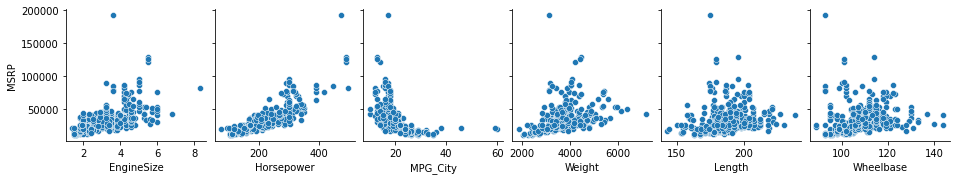

In [24]:
sns.pairplot(df, x_vars=['EngineSize','Horsepower','MPG_City','Weight','Length','Wheelbase'], y_vars=['MSRP'],aspect=0.9)

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)